# Machine Learning with MNIST Data

In [1]:
# Importing all Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from subprocess import call

For this Project, we will be using the data that is available to us on this website: http://yann.lecun.com/exdb/mnist/. We store the files in a seperate working directory called MNIST dataset. We will then need to extract the files into our notebook in order to work with the data.

In [2]:
# Create a funcion that loads in data from our stored directory
# This function will then convert the stored data into a low level Numpy array
# Read all files that end with '-images.idx3-ubyte']
# Reshape the data into a 3D array containing width, height and data

def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images.idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'int64' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels.idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

trainImages, trainLabels = loadMNIST( "train", r"C:/Users/chris/Dropbox/cm22020002622/3- Machine Learning/Task 8/MNIST DataSet/" )
testImages, testLabels = loadMNIST( "t10k", r"C:/Users/chris/Dropbox/cm22020002622/3- Machine Learning/Task 8/MNIST DataSet/" )

In [3]:
# Printing the shape of our data

print(trainImages.shape)
print(trainLabels.shape)
print(testImages.shape)
print(testLabels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Printing the array dimensions to better understand our arrays

print('Array Dimensions: ',trainImages.ndim)
print('Array Dimensions: ',trainLabels.ndim)
print('Array Dimensions: ',testImages.ndim)
print('Array Dimensions: ',testLabels.ndim)

Array Dimensions:  3
Array Dimensions:  1
Array Dimensions:  3
Array Dimensions:  1


In [5]:
# Checking the type of data we are working with

print('Data Type: ',trainImages.dtype)
print('Data Type: ',trainLabels.dtype)
print('Data Type: ',testImages.dtype)
print('Data Type: ',testLabels.dtype)

Data Type:  int64
Data Type:  uint8
Data Type:  int64
Data Type:  uint8


Our data has successfully been loaded into our Jupyter Notebook. We see from our training data that we have 60 000 data values to work with and from our training data set, we have 10 000. Currently we find that our data has been split into 1 set consisting of a 3-Dimensional array, and the other consisting of a 1-Dimensional array. In order for us to work with the data such that we may split it into X and y variables, we need to convert our arrays into either 2-Dimensional or 1-Dimensional arrays.

Another thhing to note, is that our data contains 2 types. 1 being data stored as a float and the other being data stored as a uint8 type. We can infer from our data that the uint8 type is seen as the categorical set. When employing Machine Learning algorythms, it is best to encode the data as type int or float. This helps with accuracy of predictions for our models. In order to convert our categorical data into numeric, continuous data, we need to encode the values. 

In [6]:
# using the Label Encoder library from sklearn to encode our categorical data

le = LabelEncoder()
trainLabels = le.fit_transform(trainLabels)

le = LabelEncoder()
testLabels = le.fit_transform(testLabels)

print('Categorical Data Type: ',trainLabels.dtype)
print('Categorical Data Type: ',testLabels.dtype)

Categorical Data Type:  int64
Categorical Data Type:  int64


Data has successfully been converted to numeric types. 

Our dataset contained 4 files. 2 training and 2 testing. Both training and testing sets contain labels and Images. We can assume from this then that Images contains the data values while Labels contains the data feature names. Therefore Images equates to our X variable and Labels equate to our y variable. 

When performing Machine Learning on datasets, we split the data into training and testing. We already have the split as seen in our 4 files, therefore, we can ignore the test data for the time being. We will be working with the training dataset to produce our Machine Learning algorythms and once all is done, only then will we be needing to call our test data to apply our model.

In [7]:
# Ignoring the test dataset and allocating X and y variables to the training dataset

X = trainImages
y = trainLabels

In [8]:
# Once again checking the array dimensions of our X variable

X.ndim

3

In order to work with the train_test_split function, both our datasets need to be in arrays of 2-D or less. Our X variable contains a 3-D array. We know the array shape is equal to (60 000, 28, 28). What this means is that we have 60 000 values (images) with height and width of 28. In order for us to convert this into a 2-D array, we simply reshape our array into X = number of images, (width * height). This should give us a 2-D array equalling (60 000, 784).

In [9]:
# Converting 3-D array into a 2-D array

X = X.reshape(X.shape[0],(X.shape[1]*X.shape[2]))
print(X.shape)

(60000, 784)


### Preview some images contained

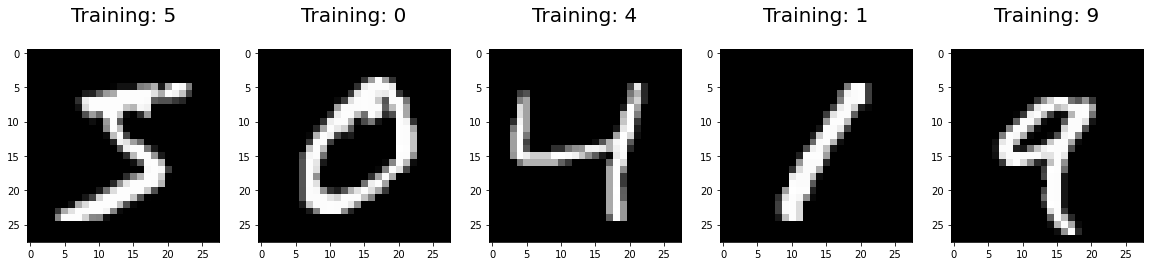

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(trainImages[0:5], trainLabels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

## Splitting Our Data for Training

We may now proceed with the first steps of machine learning. We have a training dataset containing 60 000 values and a test dataset containing 10 000. What we need to do, in order for us to achieve optimum accuracy of our desired models, is to further split our data such that we have a train, validation and testing set. Due to the large sum of values found in our training dataset, we can split that further into a training and validation set.

In [11]:
# Splitting our training dataset into training and validation sets
# Splitting by 80% training, 20% validation.

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.8, random_state=42)

In [12]:
print(X_train.shape)
print(X_validate.shape)

(48000, 784)
(12000, 784)


### Preview Some Images in Training Set

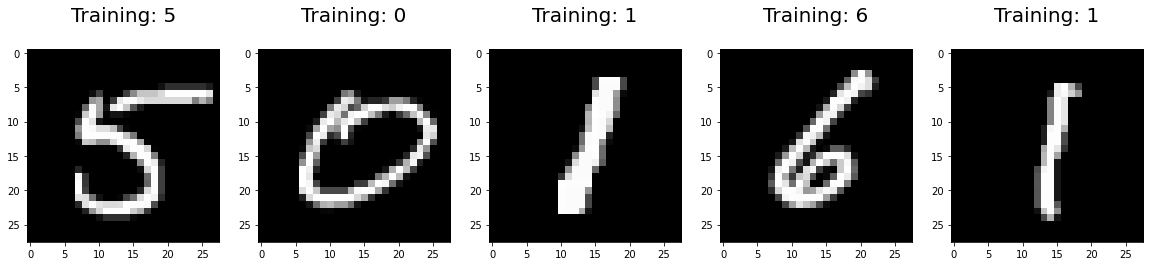

In [13]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

When splitting our data, we need to take into account the distribution of our split sets. We can view how our data has been split with a simple histogram. If it seems as though our training and validation set has been split uniformly, we need not shuffle our data sets

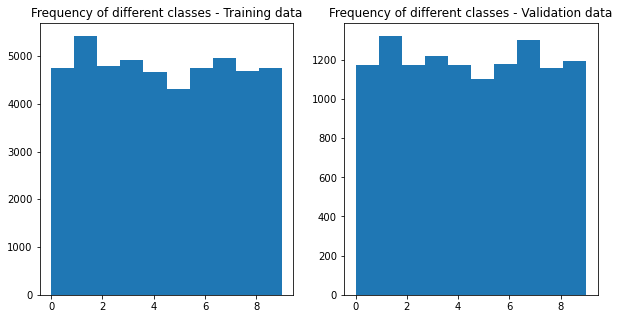

In [14]:
# Simple Histogram showing data distribution

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_validate);
plt.title('Frequency of different classes - Validation data');

From the above graphs, we see that our data has an even distribution for both training and validation sets. 

## Choosing Machine Learning Models

For this task, I will be utilizing the Logistic Regression Model, as well as a Random Forest Tree Model. 

I will be using Logistic Analysis as it is used to understand the relationship between the dependent variable and one or more independent variables. in other words, we can use the model to predict the class (or category) of individuals based on one or multiple predictor variables (x).

I will be using Random Forest modelling as It can perform both regression and classification tasks. The random forest algorithm provides a higher level of accuracy in predicting outcomes over the standard decision tree algorithm.

### 1. Random Forest Analysis of the MNIST Data

In [62]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Performing a Accuracy score of our Random Forest against our Validation set

print("Accuracy of Development Dataset using Random Forests:\n=",rf.score(X_validate, y_validate))

Accuracy of Development Dataset using Random Forests:
= 0.96925


Here we see that having used the Random Forest Classifier model, we arrive at a accuracy score of 96.92% on the validation set. This is very good and gives us a indication as to how well our model can classify the Labels data based off the Image data. 

Although this is a very high score, we will still end up with some values being missclassified. We then need to tune our model further to try achieve a higher accuracy score,  so that we may apply the model to our test data set.

In [65]:
# Calculating the Out-of-Bag score

forest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

forest.fit(X_train, y_train)

print("Out-of-Bag Score of Development Dataset using Random Forests:\n=",forest.oob_score_)

Out-of-Bag Score of Development Dataset using Random Forests:
= 0.8861508085841843


The Out of Bag Score is another name for the R^2 of the model. Currently our Random Forest model is displaying a R^2 value of 0.88

What we find here is that our Random Forest Model gave is that there is a High correlation between our predictor variables and the response variable.

### Random Forest Model Tuning

#### N_estimators

30 trees
Accuracy Score:  0.9635833333333333

50 trees
Accuracy Score:  0.96725

100 trees
Accuracy Score:  0.96925

200 trees
Accuracy Score:  0.9694166666666667

500 trees
Accuracy Score:  0.9696666666666667

1000 trees
Accuracy Score:  0.9696666666666667

2000 trees
Accuracy Score:  0.9703333333333334



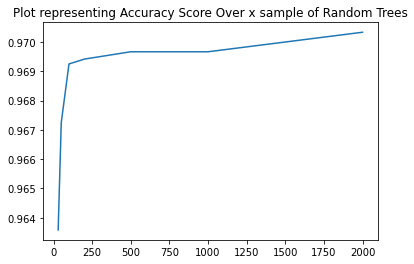

In [91]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_validate, y_validate)
    results.append(acc)
    print(trees, 'trees')
    print('Accuracy Score: ', acc)
    print('')

pd.Series(results, n_estimator_options).plot()
plt.title('Plot representing Accuracy Score Over x sample of Random Trees')
plt.show()

#### Minimum Samples per branch

2 Minimum Samples
Accuracy Score:  0.9663333333333334

4 Minimum Samples
Accuracy Score:  0.96325

6 Minimum Samples
Accuracy Score:  0.9605833333333333

8 Minimum Samples
Accuracy Score:  0.9589166666666666

10 Minimum Samples
Accuracy Score:  0.9561666666666667

12 Minimum Samples
Accuracy Score:  0.95475



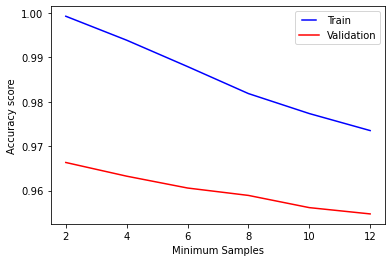

In [98]:
# Create a function to show how accurate the model performs based on minimum observations needed

train_results = []
validate_results = []
min_sample_option = [2, 4, 6, 8, 10, 12]

for min_sample in min_sample_option:
    model = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features='auto',
                                 min_samples_leaf=min_sample)
    model.fit(X_train, y_train)
    acc1 = model.score(X_train, y_train)
    train_results.append(acc1)
    acc = model.score(X_validate, y_validate)
    validate_results.append(acc)
    print(min_sample, 'Minimum Samples')
    print('Accuracy Score: ', acc)
    print('')

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_sample_option, train_results, 'b', label='Train')
line2, = plt.plot(min_sample_option, validate_results, 'r', label='Validation')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Minimum Samples')
plt.show()

#### Max Tree depth

1.0 Max_Depth
Accuracy Score:  0.5016666666666667

5.0 Max_Depth
Accuracy Score:  0.8564166666666667

9.0 Max_Depth
Accuracy Score:  0.937

13.0 Max_Depth
Accuracy Score:  0.9610833333333333

17.0 Max_Depth
Accuracy Score:  0.9666666666666667

21.0 Max_Depth
Accuracy Score:  0.9685

25.0 Max_Depth
Accuracy Score:  0.96625

29.0 Max_Depth
Accuracy Score:  0.9689166666666666

33.0 Max_Depth
Accuracy Score:  0.9685833333333334



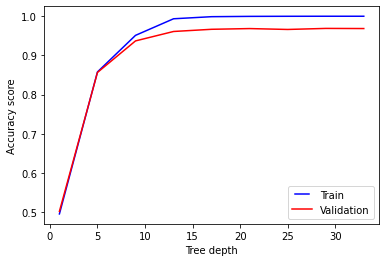

In [107]:
max_depths = np.linspace(1, 33, 9, endpoint=True)
train_results = []
valid_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    acc1 = rf.score(X_train, y_train)
    train_results.append(acc1)
    acc = rf.score(X_validate, y_validate)
    valid_results.append(acc)
    print(max_depth, 'Max_Depth')
    print('Accuracy Score: ', acc)
    print('')
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train')
line2, = plt.plot(max_depths, valid_results, 'r', label='Validation')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

What I have done here, was represent the different accuracy scores our model has on the trained data vs the validation data set. This allows us to better select a feature to prune when applying our chosen model on our test data set. The features that I have chosen were: n_estimators; min_sample; max_depth. If we look at how our model behaves with each feature, we see that n_estimators provides the greatest degree of model accuracy compared to the other features. 

Therefore, going forward, when I am to use my model on the test data set, I will be pruning the n_estimator values as this feature has shown to be the greatest factor attributing to a higher accuracy score than the other 2 features I tested.

### 2. Logistic Regression Analysis of MNIST DataSet

In [15]:
clf2 = LogisticRegression(fit_intercept=True, multi_class='auto', penalty='l1', solver='saga', max_iter=1000, C=50, tol=0.01)

clf2.fit(X_train, y_train)

print("Accuracy of Development Dataset using Random Forests:\n=",clf2.score(X_validate, y_validate))

Accuracy of Development Dataset using Random Forests:
= 0.9209166666666667


Already we can see a massive difference in accuracy rating between the 2 models. Random Forests gave us an inital score of 96.69% whereas here we see the Logistic Regression model gives our vvalidation set a score of 92.1%

We can further prune our Logistics Model to try achieve a higher accuracy rating to apply to our test data set.

### Logistic Regression Model Tuning

Logistic regression does not really have any critical hyperparameters to tune. We can however, tune the given parameters to test model strength and parameter controls. 

For this particular regression model, I want to investigate tuning the C parameter. My reason for wanting to do so, is that the C parameter gives an indication as to how strong the regularization of the model is. A smaller C value will result in a stronger regularization model performance.

0.001 C Samples
Accuracy Score:  0.9210833333333334

0.01 C Samples
Accuracy Score:  0.9215

0.1 C Samples
Accuracy Score:  0.9206666666666666

1 C Samples
Accuracy Score:  0.921

10 C Samples
Accuracy Score:  0.9209166666666667

100 C Samples
Accuracy Score:  0.9209166666666667

1000 C Samples
Accuracy Score:  0.9209166666666667



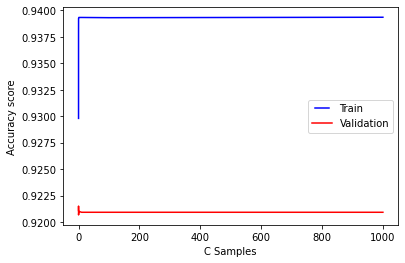

In [18]:
train_results = []
validate_results = []
C_option = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C_sample in C_option:
    model = LogisticRegression(fit_intercept=True, multi_class='auto', penalty='l1', solver='saga',
                               max_iter=1000, C=C_sample, tol=0.01)
    model.fit(X_train, y_train)
    acc1 = model.score(X_train, y_train)
    train_results.append(acc1)
    acc = model.score(X_validate, y_validate)
    validate_results.append(acc)
    print(C_sample, 'C Samples')
    print('Accuracy Score: ', acc)
    print('')

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(C_option, train_results, 'b', label='Train')
line2, = plt.plot(C_option, validate_results, 'r', label='Validation')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('C Samples')
plt.show()

Alright, This did not go how I expected it. We find here that our model for accuracy lies within a C-score of 0.001 nd 1. A C score of 10 or greater all seem to produce the exact same accuracy score for the validation set. 

What this means for us, is that our optimum C value is 0.01. The model is telling us that we should not heavely rely on the training set but rather put more weight on the complexity penalty. This is good, as a high C value basically tells us to trust the training data. which could produce biased results on unseen data.

## Applying our Models on the Test Set

In [20]:
# Assigning variables to test data set

X_test = testImages
y_test = testLabels

In [21]:
# Converting X variables to 2-D array

X_test = X_test.reshape(X_test.shape[0],(X_test.shape[1]*X_test.shape[2]))
print(X_test.shape)

(10000, 784)


### 1. Random Forest Model

n_estimators used for paramater tuning

In [23]:
# Using the random forest model on our test data set
# Using 500 n_estimator values

model = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=42)

model.fit(X_train, y_train)

acc = model.score(X_test,y_test)
print("Accuracy of Test Dataset using Random Forests:\n=",acc)

Accuracy of Test Dataset using Random Forests:
= 0.9704


### 2. Logistic Regression Model

C-Value used for parameter tuning

In [24]:
# Using Logistic Regression model on our test data set
# C value set to 0.01

clf = LogisticRegression(fit_intercept=True, multi_class='auto', penalty='l1', solver='saga', max_iter=1000, C=0.01, tol=0.01)

clf.fit(X_train, y_train)

print("Accuracy of Development Dataset using Random Forests:\n=",clf.score(X_test, y_test))

Accuracy of Development Dataset using Random Forests:
= 0.9237


## Visualizing Confusion Matrix for each Model

### Confusion Matrix for Random Forest Model

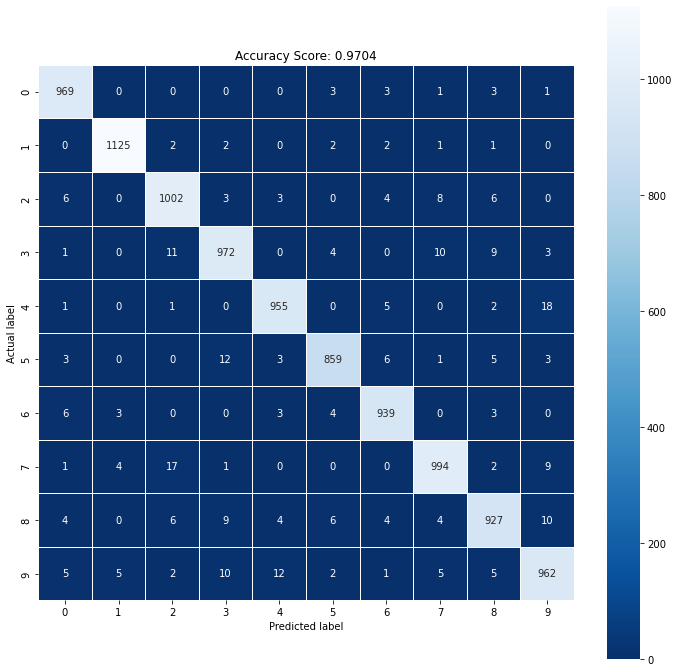

In [27]:
pred=model.predict(X_test)
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title);

### Confusion Matrix for Logistic Regression Model

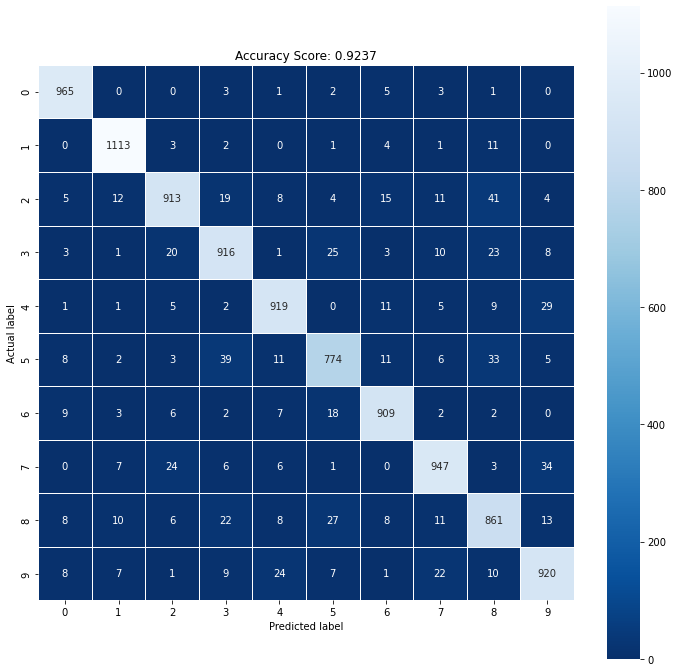

In [28]:
pred=clf.predict(X_test)
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title);

Looking at our confusion matrices for both our models, it is interesting to note that they both performed relatively the same per class. Both models had a high rate of correct classification predictions for class 1 and class 2. Both models seemed to struggle a lot with classifying class 5. Looking at both matrices, class 5 has the lowest correctly predicted score.

## Producing a Classification Report

### 1. Random Forest Classification report

In [30]:
# Using sklearn classification report

pred=model.predict(X_test)

print ("Classification Report\n")
print(classification_report(y_test, pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 2. Logistic Regression Classification Report

In [31]:
# Using sklearn classification report

pred=clf.predict(X_test)

print ("Classification Report\n")
print(classification_report(y_test, pred))

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.94      0.93       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Accuracy is the fraction of predictions our model got right.

Precision is the proportion of predictions of the positive class that is correct.

Recall is a measure of how many instances of a class the model was able to
recognise.

The F1 score is the weighted average of Precision and Recall.

## Summary of Findings

For this task I chose 2 different classification models to train my data on. Those being; Random Forests and Logistic Regression.

I had undergone for both models just 1 parameter tuning. Each model consists of multiple parameters whereby a person may tune and process them, so my conclusion is not indicitive of a truly optimised model. 

What I did find is that the random forest model performed significantly better than the logistic regression model. In the end, when I applied each model to my testing data set; after having tuned their parameters; It was shown that the Random Forest Model achieved an accuracy score of 97.04% while the Logistic Regression model achieved an accuracy score of 92.37%.

Looking at each models F1 scores, the Random Forest model again achieved greater results than the logistic regression model. 

I conclude that for this project, based on the parameters I tuned for, The Random Forest Model has proven to be the better suited model for classifying this particular Data Set.